#Comparar nubes de palabras usando tf-idf

## **Librerias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
from PIL import Image
import numpy as np
import nltk
import re

!pip install -q wordcloud
import wordcloud
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

##**Módulos**

In [ ]:
#========= MODULOS =================
#JUNTA UN ARRAY DE STRING'S EN UN SOLO STRING
def juntar(arr):
    text=''
    for x in range(0,len(arr)):
        text=text+arr[x]
    return text

def hacer_corpus(tweets):
    corpus = []
    for i in range(0, len(tweets)):
        #print(i)
        #eliminamos los links y hasgtags
        tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                        if 'http' not in word and '@' not in word and '#' not in word])
        #definimos que caracteres que pueden leer
        title = re.sub('[^a-zA-Z_á_é_í_ó_ú_ñ_Á_É_Í_Ó_Ú]', ' ', tweets['text'][i])
        #transformamos las mayusculas en minusculas
        title = title.lower()
        #generamos los arreglos respectivos para los tweets con los carcteres aceptados
        title = title.split()
        #print(title)
        #eliminamos aquellas palabras que esten en el stopwords del español
        title = [word for word in title if not word in stopwords.words('spanish')]
        #volvemos a crear el corpus con las palabras aceptadas
        title = ' '.join(title)
        corpus.append(title)
    return corpus

## 1.  Carga y procesado texto (data set)

In [ ]:
#descarga de pacquete de palabras para omitir
nltk.download('stopwords')
stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:
#leemos el archivo CSV previamente extraidos de twitter
tweets1=hacer_corpus(pd.read_csv('PoliciaPeru.csv'))
tweets2=hacer_corpus(pd.read_csv('SeleccionPeru.csv')) 
#volvemos un string
Bow1=juntar(tweets1)
Bow2=juntar(tweets2)
#print(Bow1)
#print(Bow2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Setup
pd.set_option("display.precision", 4)
# Cargamos dataset
dat = [
         ['X', Bow1],
         ['Y', Bow2],
      ]
df_sentences = pd.DataFrame(dat, columns=['Etiqueta', 'Contenido'])

labels = df_sentences['Etiqueta']
print("Etiquetas:")
print(labels)

n_clusters = np.unique(labels).shape[0]
print("n_clusters:", n_clusters)

Etiquetas:
0    X
1    Y
Name: Etiqueta, dtype: object
n_clusters: 2


## 2. Vectorizar texto en una matriz numérica

In [ ]:
# Build tf-idf vectorizer and cosine similarity matrix
def build_vectorizer(sentences, vocab=None, min_df=0.0, max_df=1.0, ngram_range=(1,1)):   # for a 2-gram use: ngram_range=(1,2)
    '''
    Construya el vectorizador tf-idf:
     1. Construya el count_vectorizer a partir del data set de entrada.
     2. Transforme count_vectorizer en bolsa de palabras.
     3. Adapte la transformación a la bolsa de palabras.
    '''
    
    # Construimos count vectorizer
    count_vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, vocabulary=vocab, ngram_range=(1,1))  # stop_words='english, max_features=N_FEATURES 
    cvec = count_vectorizer.fit(sentences)

    # Obtener nombres de funciones
    feature_names = cvec.get_feature_names()

    # Obtener bolsa de palabras y analizar
    bag_of_words = cvec.transform(sentences)
    df_bag_of_words = pd.DataFrame(bag_of_words.todense(), columns=feature_names)
    
    # Transforma bag_of_words en matriz tf-idf
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(bag_of_words)

    # Encuentra las palabras más populares y los pesos más altos
    word_cnts = np.asarray(bag_of_words.sum(axis=0)).ravel().tolist()  # for each word in column, sum all row counts
    df_cnts = pd.DataFrame({'word': feature_names, 'count': word_cnts})
    df_cnts = df_cnts.sort_values('count', ascending=False)

    # Cree pesos de palabras como una lista y ordénelos
    weights = np.asarray(tfidf.mean(axis=0)).ravel().tolist()
    df_weights = pd.DataFrame({'word': feature_names, 'weight': weights})
    df_weights = df_weights.sort_values('weight', ascending=False)

    df_weights = df_weights.merge(df_cnts, on='word', how='left')
    df_weights = df_weights[['word', 'count', 'weight']]

    # Similitud de oraciones
    cos_sim = cosine_similarity(tfidf, tfidf)

    # Matriz de distancia de oraciones
    samp_dist = 1 - cos_sim

    return cvec, feature_names, df_bag_of_words, tfidf, df_weights, cos_sim, samp_dist
  
# Construccion
sentences = df_sentences['Contenido'].values.tolist()
cvec, feature_names, df_bag_of_words, tfidf, df_weights, cos_sim, samp_dist = build_vectorizer(sentences)

df_tfidf = pd.DataFrame(tfidf.todense(), columns=feature_names)

print("%d data set:" % len(sentences))
print(sentences)
print("---")
print("%d numero de palabras (cada palabra)" % len(feature_names))
print(feature_names)
print("---")
print("df_tfidf[%d,%d]:" % (len(sentences), len(feature_names)))
print(df_tfidf.to_string())
print("---")
print("df_weights:")
print(df_weights)

2 data set:
['efectivos policiales comisaría bellavista brindaron charlas educativas sensibilización conceptos bullying ciberbullying dirigido niños adolescentes centro poblado montenegro hizo entrega material educativotrabajo conjunto municipalidad provincial huanta juntas vecinales huantachaca realizamos entrega canastas conteniendo productos primera necesidad maestros conmemorarse díahoy aniversario creación dirección policía fiscal saludamos hombres mujeres luchan contrabando piratería elaboración productos farmacéuticos sanitarios adulteradospersonal policial realizó campaña sensibilización medidas prevención distrito pillco marca hizo entrega volantes informativos transeúntes zonaescuchado modalidad estafa subsidio fallecimiento consiste pedir dinero familiares fallecidos cambio acelerar trámites cobro beneficios sociales damos recomendaciones evites ser víctimapersonal policial intervino tres sujetos bordo mototaxi horas asaltado transeúntes distrito incautó arma fuego hechiza l

## 3. Bag-of-words

In [ ]:
print("df_bag_of_words[%d,%d]:" % (len(sentences), len(feature_names)))
print(df_bag_of_words)

df_bag_of_words[2,1961]:
   abastecida  abnegada  abnegado  aborden  ...  éxito  éxitos  últimopaís  útiles
0           2         1         1        1  ...      0       1           0       2
1           0         0         0        0  ...      1       0           1       0

[2 rows x 1961 columns]


##4. Construccion de una nube de palabras a partir de las palabras ponderadas

In [ ]:
#Promedios - palabra - n-veces - peso
print(df_weights)
#creacion de nube
s_word_freq = pd.Series(df_weights['count'])
s_word_freq.index = df_weights['word']
di_word_freq = s_word_freq.to_dict()

               word  count  weight
0          policial     63  0.2230
1            fútbol     54  0.2120
2     sudamericanas     53  0.2081
3             playa     53  0.2081
4        policiales     40  0.1416
...             ...    ...     ...
1956          lurín      1  0.0035
1957          lunas      1  0.0035
1958         luisrt      1  0.0035
1959        lugares      1  0.0035
1960      instantes      1  0.0035

[1961 rows x 3 columns]


In [ ]:
#Impresion de frecuencias de palabras
print("Frecuencia de palabras:")
for k,v in di_word_freq.items():
  print(k,v)

Frecuencia de palabras:
policial 63
fútbol 54
sudamericanas 53
playa 53
policiales 40
partido 34
personal 43
olímpico 25
sujetos 27
distrito 24
general 24
eliminatorias 21
cárdenas 22
cervantes 22
césar 22
mira 19
estadio 19
dos 29
barra 18
complejo 18
pnp 19
efectivos 18
final 16
intervino 17
duelo 15
incautó 15
sujeto 15
vamos 13
interior 14
banda 14
tiempo 12
cuartos 12
segundo 17
productos 13
río 16
janeiro 11
goiania 11
tijuca 11
arma 12
personas 12
edad 12
primer 15
aquíeliminatorias 10
augusto 11
fuego 11
fin 11
acción 11
inteligencia 10
asimismo 10
operativo 10
comisaría 10
criminal 10
seguridad 10
enfrentar 9
subasta 9
marcador 9
día 13
acciones 9
integrantes 9
capturó 9
aniversario 9
brasilia 8
minutos 8
hora 8
lima 8
halló 8
cantidad 8
capturaron 8
detuvo 8
provincia 8
entrega 8
gran 11
trabajo 11
tres 11
imágenes 7
enfrentará 7
beneficio 10
peruana 9
mayor 7
dirección 7
asaltado 7
paquetes 7
encontraba 7
detuvieron 7
medidas 7
atención 7
años 7
persona 7
intervención 7
gol 

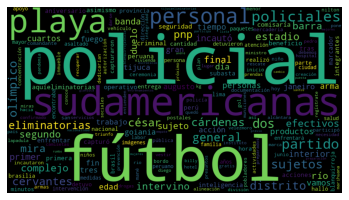

In [ ]:
#Impresion de la nube de palabras
cloud = wordcloud.WordCloud(width=900, height=500).generate_from_frequencies(di_word_freq)
plt.imshow(cloud)
plt.axis('off')
plt.show()